100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


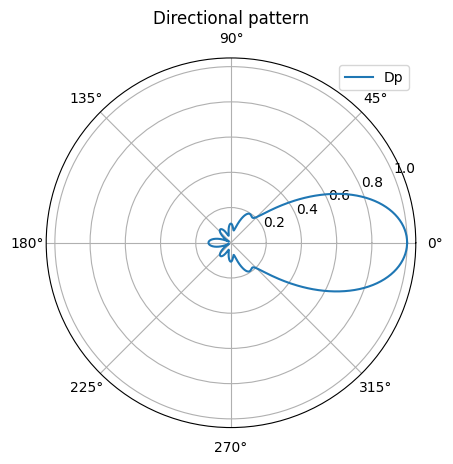

In [1]:

import better 

import numpy as np
from solver_for_Pocklington_equation import directional_pattern

#* Define constants
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

#* set geometry of antenna
element_position = np.array([0.0, 0.312, 0.447, 0.699, 1.05, 1.482, 1.986, 2.553, 3.168])
element_length = np.array([1.038, 0.955, 0.956, 0.932, 0.916, 0.906, 0.897, 0.891, 0.887])
wire_radius = 3.175e-3
source_position = np.array([[0,element_position[1],0]], dtype = float)

#! Spatial resolution
delta_z = light_speed / frequency / 5e2

R, R_block, element_num, incident_field, impedance, current, current_block, P_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)

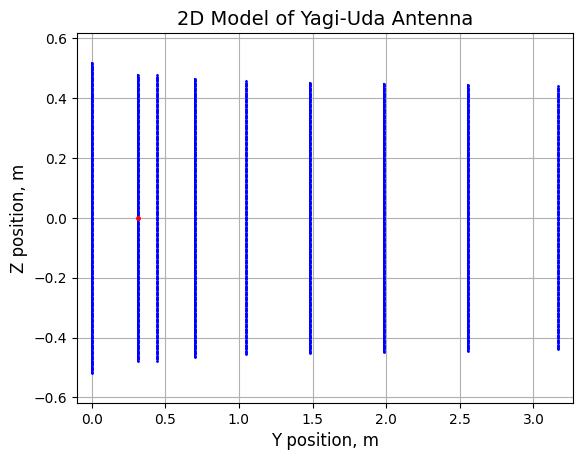

c:\Users\lukas\OneDrive\Документы\Method-of-moment-for-antennas\visualization.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


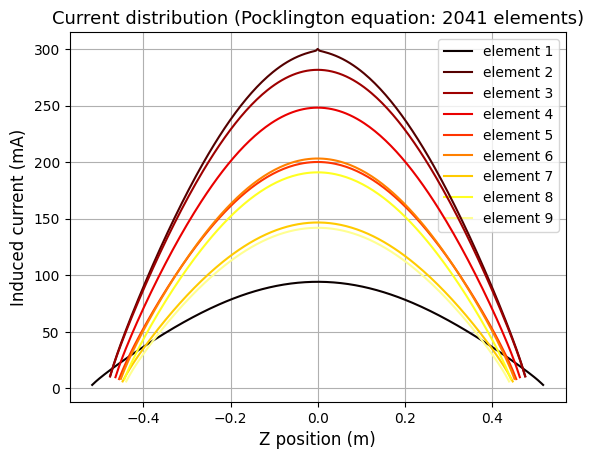

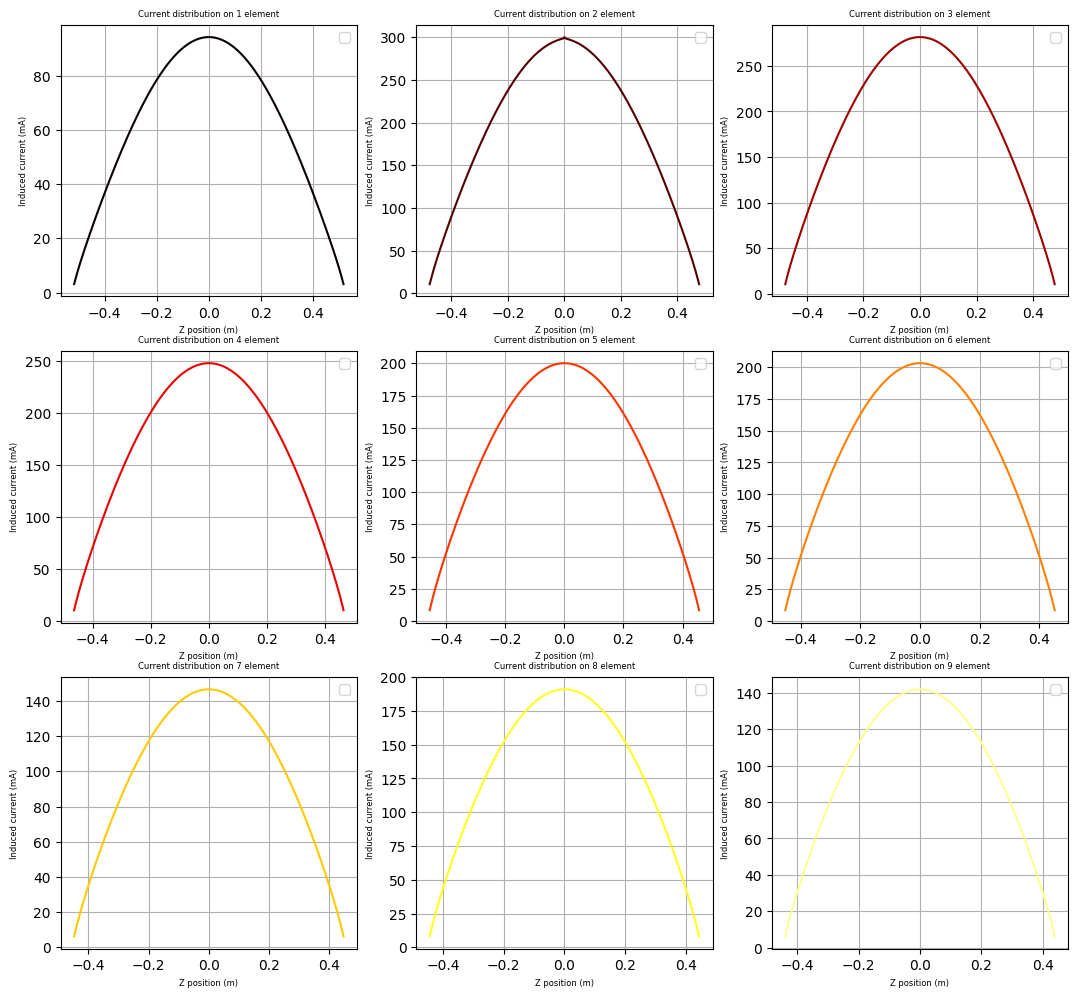

In [2]:
from visualization import plot_2dmodel, plot_together, plot_separately

plot_2dmodel(R, source_position, sum(element_num), delta_z)
plot_together(R_block, current_block)
plot_separately(R_block, current_block)